In [1]:
from penis_detect import detecting_shit as ds
import cv2
import random
%matplotlib inline 
from matplotlib import pyplot as plt
import time 

In [2]:
# this is probably reinventing the wheel but im too lazy
def draw_bboxes(img, input_json):
    for anno in input_json['shapes']:
        ptsarr = anno['points']
        color = (random.randint(0,255), random.randint(0,255), 128)
        plotted = cv2.rectangle(img, (int(ptsarr[0][0]),int(ptsarr[0][1])),(int(ptsarr[1][0]),int(ptsarr[1][1])) , color, 1)
        img = plotted
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img, interpolation='nearest')
    plt.show()

0.7003841400146484


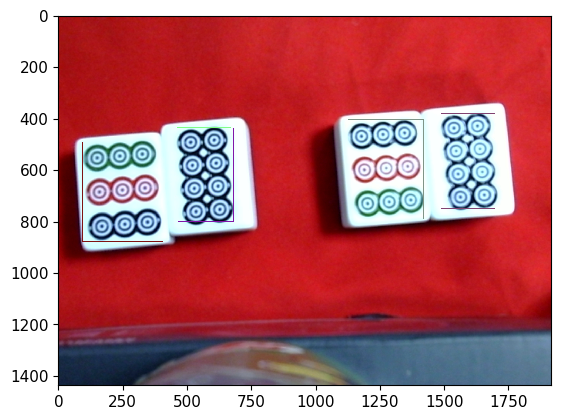

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': '8',
   'points': [[461.0, 436.0], [671.0, 822.0]],
   'confidence': '0.70849609375',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '9',
   'points': [[95.0, 492.0], [409.0, 879.0]],
   'confidence': '0.8564453125',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '8',
   'points': [[465.0, 437.0], [682.0, 802.0]],
   'confidence': '0.91357421875',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '9',
   'points': [[1126.0, 405.0], [1420.0, 793.0]],
   'confidence': '0.91552734375',
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '8',
   'points': [[1488.0, 382.0], [1697.0, 751.0]],
   'confidence': '0.96533203125',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imageHeight': 1437,
 'imageWidth': 1916}

In [7]:
MODEL_PATH = "C:\\auto_label\\detect-models\\28Detv1.13_300x300.pt"
DEVICE = int("0")
CONFIDENCE = 0.5
SZ = (300,300)
IMAGE_PATH = "C:\\Users\\hbwindows\\Downloads\\28_dataset-20230911T095703Z-001\\28_dataset\\fullImage-1683002043222.jpeg"
def get_single_det(img):
    t1 = time.time()
    result = ds.ClassifyShit(IMAGE_PATH).detect_from_model(MODEL_PATH, DEVICE, CONFIDENCE, SZ)
    print(time.time() - t1)
    pic = draw_bboxes(cv2.imread(IMAGE_PATH) ,result)
    return result
get_single_det(IMAGE_PATH)